## Scenario

I am a junior data analyst working in the marketing analyst team at Cyclistic __(fictional company)__, a bike-share company in Chicago. The director
of marketing believes the company’s future success depends on maximizing the number of annual memberships. Therefore,
my team wants to understand how casual riders and annual members use Cyclistic bikes differently. From these insights,
my team will design a new marketing strategy to convert casual riders into annual members. But first, Cyclistic executives
must approve my recommendations, so they must be backed up with compelling data insights and professional data
visualizations.

## Case Study Roadmap
1. Ask
2. Prepare
3. Process
4. Analyze
5. Share
6. Act

## Ask<br>
Three questions will guide the future marketing program:<br>
1. How do annual members and casual riders use Cyclistic bikes differently?
2. Why would casual riders buy Cyclistic annual memberships?
3. How can Cyclistic use digital media to influence casual riders to become members?

<hr>

In [1]:
import pandas as pd
from IPython.display import display
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import os
import time

## Prepare <br>

__Case Study Roadmap - Prepare__<br>
__Guiding questions__
- Where is the data located? The data is stored online and shareable  | [data source](https://divvy-tripdata.s3.amazonaws.com/index.html)

- How is the data organized? The data is organized in a structured format and stored in a csv file
- Are there issues with bias or credibility in this data? Does your data ROCCC?
  - Reliability: This data is reliable.. 
  - Originality: The data is original as it was collected by our company and stored in a proper format.
  - Comprehensiveness: This data is not so comprehensive.  We have a lot of missing values, we needed to collect data      about the sex and ages of the clients as it will help us in the marketing campains and insights.
  - Current: This data is up-to-date.

  - Cited: The data is cited and original.

- How did you verify the data’s integrity? It is first party data and has been cleaned properly.
- How does it help you answer your question? A lot of attributes that we can use in the analysis and can also engineer some new attributes  
- Are there any problems with the data? A lot of missing values<br>


- How is the data organized? The data is organized in a structured format and stored in a CSV file.

- Are there issues with bias or credibility in this data? Does your data ROCCC?

  - Reliability: This data is reliable.

  - Originality: The data is original as it was collected by our company and stored in a proper format.

  - Comprehensiveness: The data is not comprehensive. There are several missing values, we needed data about the ages and gender of the riders. Obtaining this information would be beneficial for marketing campaigns and insights.

  - Current: The data is up-to-date.

  - Cited: The data is original and properly cited.

- How did you verify the data's integrity? The data is first-party data and has been thoroughly cleaned.

- How does it help you answer your question? The data provides numerous attributes for analysis, and it is possible to derive new attributes through data engineering.

- Are there any problems with the data? There are many missing values.

In [2]:
dir = './'
files = os.listdir(dir)

csv_files = [file for file in files if file.endswith('.csv')]
# 
## remove zip files
# zip_files = [file for file in files if file.endswith('.zip')]
# for file in zip_files:
#     file_path = (dir + file)
#     os.remove(file_path)

csv_files

['cyclistic1.csv',
 '202208-divvy-tripdata.csv',
 '202205-divvy-tripdata.csv',
 '202303-divvy-tripdata.csv',
 '202206-divvy-tripdata.csv',
 '202210-divvy-tripdata.csv',
 '202212-divvy-tripdata.csv',
 '202211-divvy-tripdata.csv',
 '202304-divvy-tripdata.csv',
 '202302-divvy-tripdata.csv',
 '202207-divvy-tripdata.csv',
 'cyclistic.csv',
 '202209-divvy-publictripdata.csv',
 '202301-divvy-tripdata.csv']

In [3]:
# Each file contains comprehensive cyclist data from January to December (The data citation is provided in the visualizations)
cyclistic_csv = [
 '202208-divvy-tripdata.csv',
 '202205-divvy-tripdata.csv',
 '202303-divvy-tripdata.csv',
 '202206-divvy-tripdata.csv',
 '202210-divvy-tripdata.csv',
 '202212-divvy-tripdata.csv',
 '202211-divvy-tripdata.csv',
 '202304-divvy-tripdata.csv',
 '202302-divvy-tripdata.csv',
 '202207-divvy-tripdata.csv',
 '202209-divvy-publictripdata.csv',
 '202301-divvy-tripdata.csv']

for file in cyclistic_csv:
    cyclistic_df = pd.read_csv(file)
    cyclistic = pd.concat([cyclistic, cyclistic_df], axis=0)
    

In [5]:
cyclistic

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,550CF7EFEAE0C618,electric_bike,2022-08-07 21:34:15,2022-08-07 21:41:46,NaN,NaN,NaN,NaN,41.930000,-87.690000,41.940000,-87.720000,casual
1,DAD198F405F9C5F5,electric_bike,2022-08-08 14:39:21,2022-08-08 14:53:23,NaN,NaN,NaN,NaN,41.890000,-87.640000,41.920000,-87.640000,casual
2,E6F2BC47B65CB7FD,electric_bike,2022-08-08 15:29:50,2022-08-08 15:40:34,NaN,NaN,NaN,NaN,41.970000,-87.690000,41.970000,-87.660000,casual
3,F597830181C2E13C,electric_bike,2022-08-08 02:43:50,2022-08-08 02:58:53,NaN,NaN,NaN,NaN,41.940000,-87.650000,41.970000,-87.690000,casual
4,0CE689BB4E313E8D,electric_bike,2022-08-07 20:24:06,2022-08-07 20:29:58,NaN,NaN,NaN,NaN,41.850000,-87.650000,41.840000,-87.660000,casual
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5859056,A303816F2E8A35A8,electric_bike,2023-01-11 17:46:23,2023-01-11 17:57:31,Clark St & Elm St,TA1307000039,Southport Ave & Clybourn Ave,TA1309000030,41.902634,-87.631591,41.920771,-87.663712,casual
5859057,BCDBB142CC610382,classic_bike,2023-01-30 15:08:10,2023-01-30 15:33:26,Western Ave & Leland Ave,TA1307000140,Clarendon Ave & Gordon Ter,13379,41.966400,-87.688704,41.957867,-87.649505,member
5859058,7D1C7CA80517183B,classic_bike,2023-01-06 19:34:50,2023-01-06 19:50:01,Clark St & Elm St,TA1307000039,Southport Ave & Clybourn Ave,TA1309000030,41.902973,-87.631280,41.920771,-87.663712,casual
5859059,1A4EB636346DF527,classic_bike,2023-01-13 18:59:24,2023-01-13 19:14:44,Clark St & Elm St,TA1307000039,Southport Ave & Clybourn Ave,TA1309000030,41.902973,-87.631280,41.920771,-87.663712,casual


In [6]:
cyclistic.shape

(5859061, 13)

__Many missing values__<br>
1. We will address this problem by trying to filling the NaN values using the records in the other columns
2. After finishing the first stage, we will remove the rows that have NaN.

In [7]:
print(cyclistic['ride_id'].isnull().sum(), ' NaN values in ride_id')
print(cyclistic['rideable_type'].isnull().sum(), ' NaN values in rideable_type')
print(cyclistic['started_at'].isnull().sum(), ' NaN values in started_at')
print(cyclistic['ended_at'].isnull().sum() ,  ' NaN values in ended_at')
print(cyclistic['start_station_name'].isnull().sum(), ' NaN values in start_station_name')
print(cyclistic['start_station_id'].isnull().sum(), ' NaN values in start_station_id')
print(cyclistic['end_station_name'].isnull().sum(), ' NaN values in end_station_name')
print(cyclistic['end_station_id'].isnull().sum(), ' NaN values in end_station_id')
print(cyclistic['start_lat'].isnull().sum(), ' NaN values in start_lat')
print(cyclistic['start_lng'].isnull().sum(), ' NaN values in start_lng')
print(cyclistic['end_lat'].isnull().sum(), ' NaN values in end_lat')
print(cyclistic['end_lng'].isnull().sum(), ' NaN values in end_lng')
print(cyclistic['member_casual'].isnull().sum(), ' NaN values in member_casual')

0  NaN values in ride_id
0  NaN values in rideable_type
0  NaN values in started_at
0  NaN values in ended_at
832009  NaN values in start_station_name
832141  NaN values in start_station_id
889661  NaN values in end_station_name
889802  NaN values in end_station_id
0  NaN values in start_lat
0  NaN values in start_lng
5973  NaN values in end_lat
5973  NaN values in end_lng
0  NaN values in member_casual


In [8]:
print(cyclistic['rideable_type'].isnull().sum() * 100 // len(cyclistic['rideable_type']), '% missing values in start_station_id')
print(cyclistic['ride_id'].isnull().sum() * 100 // len(cyclistic['ride_id']), '% missing values in start_station_id')
print(cyclistic['start_station_id'].isnull().sum() * 100 // len(cyclistic['start_station_id']), '% missing values in start_station_id')
print(cyclistic['start_station_id'].isnull().sum() * 100 // len(cyclistic['start_station_id']), '% missing values in start_station_id')
print(cyclistic['end_station_name'].isnull().sum() * 100 // len(cyclistic['end_station_name']), '% missing values in start_station_id')
print(cyclistic['end_station_id'].isnull().sum() * 100 // len(cyclistic['end_station_id']), '% missing values in start_station_id')
print(cyclistic['rideable_type'].isnull().sum() * 100 // len(cyclistic['rideable_type']), '% missing values in start_station_id')
print(cyclistic['member_casual'].isnull().sum() * 100 // len(cyclistic['member_casual']), '% missing values in start_station_id')

0 % missing values in start_station_id
0 % missing values in start_station_id
14 % missing values in start_station_id
14 % missing values in start_station_id
15 % missing values in start_station_id
15 % missing values in start_station_id
0 % missing values in start_station_id
0 % missing values in start_station_id


In [52]:
station = dict(zip(cyclistic['start_station_id'],cyclistic['start_station_name']))

## Process

__Case Study Roadmap - Process__  <br>
- What tools are you choosing and why? I chose python as it is a popular an efficient tool for processing and analyzing large amount of data and it has the tools that will help me in all the stages + good documentation and big community.
- What steps have you taken to ensure that your data is clean? 
   1. Sorted the data by the start and end it to ensure that all the rows are dates
   2. Looked for the NaN data and tried to fill them and removed the rest not to affect our analysis
   3. Casted the attributes of the data frame from object to the appropiate format.
   4. Removed some prefixes from the stations_name.
- How can you verify that your data is clean and ready to analyze?
- Have you documented your cleaning process so you can review and share those results?

In [10]:
# many stations has the word Public Rack - and they are the same address, so we gotta remove this prefix
cyclistic['end_station_name'] = cyclistic['end_station_name'].str.replace('Public Rack - ', '')
cyclistic['end_station_name'] = cyclistic['end_station_name'].str.replace('Pubic Rack - ', '')
cyclistic['start_station_name'] = cyclistic['start_station_name'].str.replace('Public Rack - ', '')
cyclistic['start_station_name'] = cyclistic['start_station_name'].str.replace('Pubic Rack - ', '')

__Retrieve__ the rows where either the 'Station' or the 'ID' column is NaN but not both <br>

Steps:
1. Look for rows where either start_station_name or start_station_id is null
2. Retrieve all the ids associated with the name of the station (one station may be associated with more than and ID - we will address this problem later on).
3. Find the id that has the most max(occurences) and update the NaN to that value

In [18]:
fill_nan_check = cyclistic[(cyclistic['end_station_name'].isnull() != cyclistic['end_station_id'].isnull())]
fill_nan_check

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual


In [12]:
fill_nan_check = cyclistic[(cyclistic['start_station_name'].isnull() != cyclistic['start_station_name'].isnull())]
fill_nan_check

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual


In [16]:
# station_n = 'Stony Island Ave & 63rd St'

station_n = 'Elizabeth St & Randolph St'

filtered_cyc = cyclistic[cyclistic['end_station_name'] == station_n]

id_counts = filtered_cyc.groupby('end_station_id').size().reset_index(name='occurrences')
id_counts

,end_station_id,occurrences
0,23001,782


In [17]:
# change the new_id to the one that has max occurrences 
new_id = '23001'

# cyclistic.loc[(cyclistic['end_station_id'].isnull()) & (cyclistic['end_station_name'] == station_n), 'end_station_id'] = new_id

cyclistic.loc[(cyclistic['end_station_id'].isnull()) & (cyclistic['end_station_name'] == station_n), 'end_station_id'] = new_id




__Retrieve__ stations that have more than an id and aggregate the number of each id 

To clean:
- set the station_up to the station we will update the id for 
- change  old_id to the one with the low(occurrences) and new_id with max(occurrences) 

In [26]:
# Retrieve stations that have more than an id

# Group by  and count the occurrences
station_id_counts = cyclistic.groupby(['end_station_name', 'end_station_id']).size().reset_index(name='count')

# Filter the stations with multiple ids
stations_with_multiple_ids = station_id_counts.groupby('end_station_name').filter(lambda x: len(x) > 1)

for station in stations_with_multiple_ids['end_station_name'].unique():
    station_data = stations_with_multiple_ids[stations_with_multiple_ids['end_station_name'] == station]
    for _, row in station_data.iterrows():
        id_value = row['end_station_id']
        count = row['count']
        print(f"'{station}' -> '{id_value}' with {count} occurrences.")

'Calumet Ave & 71st St' -> '15599' with 75 occurrences.
'Calumet Ave & 71st St' -> '728' with 3 occurrences.
'Central Park Ave & Ogden Ave' -> '15685' with 749 occurrences.
'Central Park Ave & Ogden Ave' -> '532' with 31 occurrences.
'Christiana Ave & Lawrence Ave' -> '15615' with 2447 occurrences.
'Christiana Ave & Lawrence Ave' -> '860' with 136 occurrences.
'Clyde Ave & 87th St' -> '20230' with 123 occurrences.
'Clyde Ave & 87th St' -> '986' with 4 occurrences.
'East End Ave & 87th St' -> '20231' with 150 occurrences.
'East End Ave & 87th St' -> '883' with 8 occurrences.
'Eberhart Ave & 61st St' -> '955' with 27 occurrences.
'Eberhart Ave & 61st St' -> 'KA1503000033' with 601 occurrences.
'Eggleston Ave & 92nd St' -> '20118' with 67 occurrences.
'Eggleston Ave & 92nd St' -> '707' with 6 occurrences.
'Ewing Ave & 106th St' -> '612' with 7 occurrences.
'Ewing Ave & 106th St' -> '980' with 9 occurrences.
'Halsted St & 111th St' -> '20127' with 134 occurrences.
'Halsted St & 111th St' -

In [31]:
station_up =  'Calumet Ave & 71st St' 
old_id = '728'
new_id = '15599'

cyclistic.loc[(cyclistic['end_station_id'] == old_id) & (cyclistic['end_station_name'] == station_up), 'end_station_id'] = new_id



In [32]:
# should execute a blank df after executing the previous code 
test_mod = cyclistic[(cyclistic['end_station_name'] == station_up) & (cyclistic['end_station_id'] == old_id)]
test_mod


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual


__Retrieve IDs that have more than a station assiciated with it__

The output is in stored in a dic - the key is the id the value for each key is the stations and the number of occurenes for that station.

__!!ONLY IF THERE IS A TYPO IN THE ADDRESS OR THE TWO ADDRESSES ARE THE SAME AND THERE IS AN EXTRA WORK LIKE "temp"__
ex. 
`  'KA1504000086': [['Kedzie Ave & 24th St', 321],
  ['Kedzie Ave & 24th St (Temp)', 4]],, `

To clean:
- set the stat_id to the station_id we will update the name for it
- change  old_station_name to the one with the low(occurrences) and new_station_name with max(occurrences) 

In [33]:
# Group by 'end_station_id' and 'end_station_name' and count the occurrences
station_counts = cyclistic.groupby(['end_station_id', 'end_station_name']).size()

# Filter the stations with more than one associated station name
stations_with_multiple_names = station_counts[station_counts.groupby('end_station_id').transform('size') > 1]

station_info = {}

# Iterate over the stations with multiple names and store the information
for station_id, station_name in stations_with_multiple_names.index:
    count = station_counts[station_id, station_name]
    station_info.setdefault(station_id, []).append([station_name, count])

end_time = time.time()

# Print the station_info dictionary
station_info


{'13053': [['Green St & Randolph St', 2902],
  ['Green St & Washington Blvd', 5627]],
 '13059': [['Bissell St & Armitage Ave', 4529],
  ['Sheridan Rd & Argyle St', 4727]],
 '13074': [['Broadway & Wilson - Truman College Vaccination Site', 7823],
  ['Broadway & Wilson Ave', 4408]],
 '13259': [['California Ave & Francis Pl', 117],
  ['California Ave & Francis Pl (Temp)', 5169]],
 '514': [['Hamlin Ave & Grand Ave', 138], ['Ridge Blvd & Howard St', 848]],
 '515': [['Hamlin Ave & Chicago Ave', 29], ['Paulina St & Howard St', 2641]],
 '517': [['Clark St & Jarvis Ave', 1038], ['Pulaski Rd & Armitage Ave', 422]],
 '518': [['Conservatory Dr & Lake St', 901],
  ['Keystone Ave & North Ave', 223]],
 '519': [['Kostner Ave & North Ave', 61], ['Wolcott Ave & Fargo Ave', 572]],
 '520': [['Greenview Ave & Jarvis Ave', 3597],
  ['Karlov Ave & Kamerling Ave', 142]],
 '523': [['Eastlake Ter & Howard St', 608],
  ['Eastlake Ter & Rogers Ave', 1600],
  ['Pulaski Rd & Roosevelt Rd', 14]],
 '525': [['Glenwood

In [35]:
stat_id =  'KA1504000086'
old_station_name = 'Kedzie Ave & 24th St (Temp)'
new_station_name = 'Kedzie Ave & 24th St'

cyclistic.loc[(cyclistic['end_station_id'] == stat_id) & (cyclistic['end_station_name'] == old_station_name), 'end_station_name'] = new_station_name



Sorting the dates in Asc and Desc order to validate them (also it will be done when type casting)


In [36]:
sorted_dt = cyclistic.sort_values('ended_at')
# sorted_dt = cyclistic.sort_values('ended_at', ascending=False)
# sorted_dt = cyclistic.sort_values('started_at')
# sorted_dt = cyclistic.sort_values('started_at', ascending=False)
sorted_dt

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
796418,50F8517D7E7767EC,electric_bike,2022-05-01 00:01:03,2022-05-01 00:05:17,Wells St & Elm St,KA1504000135,Dearborn Pkwy & Delaware Pl,TA1307000128,41.903182,-87.634456,41.898969,-87.629912,member
1363641,8FB6B55982FFBFEA,electric_bike,2022-05-01 00:03:27,2022-05-01 00:05:19,NaN,NaN,NaN,NaN,41.790000,-87.600000,41.790000,-87.600000,member
1136143,CDC371ECDDDDECB5,electric_bike,2022-05-01 00:02:14,2022-05-01 00:05:23,Sheridan Rd & Irving Park Rd,13063,Pine Grove Ave & Irving Park Rd,TA1308000022,41.954302,-87.654386,41.954383,-87.648043,member
1075408,522D5F870073DF2D,classic_bike,2022-05-01 00:00:42,2022-05-01 00:05:44,Honore St & Division St,TA1305000034,Ashland Ave & Chicago Ave,13247,41.903119,-87.673935,41.895974,-87.667725,member
1007169,0251F8A376774A3C,docked_bike,2022-05-01 00:01:40,2022-05-01 00:06:44,Clark St & Winnemac Ave,TA1309000035,Damen Ave & Foster Ave,KA1504000149,41.973348,-87.667855,41.975615,-87.679459,casual
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3741440,C0BF00A91A533E4A,classic_bike,2023-04-30 16:19:38,2023-05-01 17:19:25,Wentworth Ave & Cermak Rd*,chargingstx07,NaN,NaN,41.853214,-87.631872,NaN,NaN,casual
3594740,52F50C9221FBA751,docked_bike,2023-04-30 17:26:49,2023-05-01 18:26:50,Ashland Ave & Augusta Blvd,13248,NaN,NaN,41.899643,-87.667700,NaN,NaN,casual
3734500,497D20002858757A,docked_bike,2023-04-20 19:20:08,2023-05-02 09:54:12,Elston Ave & Cortland St,TA1305000039,NaN,NaN,41.916433,-87.666746,NaN,NaN,casual
3708556,EDFECA9918EB30E3,docked_bike,2023-04-28 10:33:05,2023-05-03 04:51:34,Clinton St & Lake St,13021,NaN,NaN,41.885637,-87.641823,NaN,NaN,casual


In [37]:
cyclistic_optm = cyclistic.dropna().drop(['start_lat', 'start_lng', 'end_lat', 'end_lng'], axis=1)

# Type casting to ensure that our data is valid and consistant
cyclistic_optm['ride_id'] = cyclistic_optm['ride_id'].astype('string')
cyclistic_optm['rideable_type'] = cyclistic_optm['rideable_type'].astype('string')
cyclistic_optm['started_at'] = pd.to_datetime(cyclistic_optm['started_at'])
cyclistic_optm['ended_at'] = pd.to_datetime(cyclistic_optm['ended_at'])
cyclistic_optm['start_station_name'] = cyclistic_optm['start_station_name'].astype('string')
cyclistic_optm['start_station_id'] = cyclistic_optm['start_station_id'].astype('string')
cyclistic_optm['end_station_name'] = cyclistic_optm['start_station_name'].astype('string')
cyclistic_optm['end_station_id'] = cyclistic_optm['start_station_name'].astype('string')
cyclistic_optm['member_casual'] = cyclistic_optm['member_casual'].astype('string')

# drop the testing rows 
# cyclistic_optm.drop(cyclistic[cyclistic['ride_id'] == 'test'].index, inplace=True)

cyclistic_optm.dtypes

ride_id                       string
rideable_type                 string
started_at            datetime64[ns]
ended_at              datetime64[ns]
start_station_name            string
start_station_id              string
end_station_name              string
end_station_id                string
member_casual                 string
dtype: object

In [38]:
cyclistic_optm.shape 

(4534125, 9)

In [39]:
cyclistic_optm.describe()

/var/folders/lx/3vnr3w5551s3tvq2yyg38s8h0000gn/T/ipykernel_4626/3631059576.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  cyclistic_optm.describe()
/var/folders/lx/3vnr3w5551s3tvq2yyg38s8h0000gn/T/ipykernel_4626/3631059576.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  cyclistic_optm.describe()


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,member_casual
count,4534125,4534125,4534125,4534125,4534125,4534125,4534125,4534125,4534125
unique,4534125,3,3932240,3946116,1368,1282,1368,1368,2
top,241C440C74CB31BB,classic_bike,2022-07-09 17:23:31,2022-06-22 08:01:59,Streeter Dr & Grand Ave,13022,Streeter Dr & Grand Ave,Streeter Dr & Grand Ave,member
freq,1,2639157,8,14,70849,70849,70849,70849,2742978
first,NaN,NaN,2022-05-01 00:00:06,2022-05-01 00:05:17,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,2023-04-30 23:58:48,2023-05-01 08:06:56,NaN,NaN,NaN,NaN,NaN


ride_id
count = unique -> this ensures that each record is unique, we shouldne have more that an id for each ride.

rideable_type
unique = 3   -> we have only three bike types ['classic_bike', 'electric_bike', 'docked_bike'], this ensures that all the records are valid and consistent 

member_casual
unique = 3   -> we have only two  subscription types 'member', 'casual'] in our db, this ensures that all the records are valid, uniquene, and consistent 

started_at & ended_at
the dates ensures that our date time interval is valid as we are doing analysis on between rides from 1st of April until 30th of April 


## Analyze

__Guiding questions__
- How should you organize your data to perform analysis on it? I filled the NaN values that can be filled and dropped the others and casted the attributes types
- Has your data been properly formatted? I casted the attributes types
- What surprises did you discover in the data? 
  - The station_id values isnt consistent some values are integers and some are str
  - The dataset is pretty big so it is diff to identify patterns or relationships without proper viz
  - Using summary stats, I had a good knowledge of the numerical data
- How will these insights help answer your business questions?
  - We have kinda sufficient amount of data and will make derived columns to better identify patterns and answer the business questions
 <hr>

__Create three derived columns__ - the first for ride length in mins, the second for the day on which the ride started and the last is the month.

In [40]:
cyclistic_optm['ride_length'] = (cyclistic_optm['ended_at'] - cyclistic_optm['started_at']).dt.total_seconds() / 60
cyclistic_optm['day_of_week'] = cyclistic_optm['started_at'].dt.day_name()
cyclistic_optm['start_month'] = cyclistic_optm['started_at'].dt.month_name()
cyclistic_optm

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,member_casual,ride_length,day_of_week,start_month
142,241C440C74CB31BB,classic_bike,2022-08-05 16:13:36,2022-08-05 16:22:40,DuSable Museum,KA1503000075,DuSable Museum,DuSable Museum,casual,9.066667,Friday,August
271,53A7590B28ED25E2,classic_bike,2022-08-11 23:30:11,2022-08-11 23:30:56,California Ave & Milwaukee Ave,13084,California Ave & Milwaukee Ave,California Ave & Milwaukee Ave,casual,0.750000,Thursday,August
329,C34EE790A58C0434,classic_bike,2022-08-21 14:09:08,2022-08-21 15:10:46,California Ave & Division St,13256,California Ave & Division St,California Ave & Division St,casual,61.633333,Sunday,August
357,49259B4BA064D81B,electric_bike,2022-08-21 16:15:12,2022-08-21 16:29:30,Wood St & Chicago Ave,637,Wood St & Chicago Ave,Wood St & Chicago Ave,casual,14.300000,Sunday,August
422,BEE91D557E47FE83,classic_bike,2022-08-21 02:11:26,2022-08-21 03:44:04,California Ave & Milwaukee Ave,13084,California Ave & Milwaukee Ave,California Ave & Milwaukee Ave,casual,92.633333,Sunday,August
...,...,...,...,...,...,...,...,...,...,...,...,...
5859056,A303816F2E8A35A8,electric_bike,2023-01-11 17:46:23,2023-01-11 17:57:31,Clark St & Elm St,TA1307000039,Clark St & Elm St,Clark St & Elm St,casual,11.133333,Wednesday,January
5859057,BCDBB142CC610382,classic_bike,2023-01-30 15:08:10,2023-01-30 15:33:26,Western Ave & Leland Ave,TA1307000140,Western Ave & Leland Ave,Western Ave & Leland Ave,member,25.266667,Monday,January
5859058,7D1C7CA80517183B,classic_bike,2023-01-06 19:34:50,2023-01-06 19:50:01,Clark St & Elm St,TA1307000039,Clark St & Elm St,Clark St & Elm St,casual,15.183333,Friday,January
5859059,1A4EB636346DF527,classic_bike,2023-01-13 18:59:24,2023-01-13 19:14:44,Clark St & Elm St,TA1307000039,Clark St & Elm St,Clark St & Elm St,casual,15.333333,Friday,January


__Statistical summary of the ride_length column.__

In [41]:
cyclistic_optm['ride_length'].describe()

count    4.534125e+06
mean     1.656032e+01
std      3.622616e+01
min     -1.687000e+02
25%      5.866667e+00
50%      1.030000e+01
75%      1.846667e+01
max      3.203545e+04
Name: ride_length, dtype: float64

## Share

Deliverables: 
- Casual members are almost double the count of the annual members.
- Annual members show more consistent numbers throughout the year, with slightly higher usage in Summer and Fall.
- From the daily total rides and ride length we conclude that Annual members are more active on weekends.
- Annual members are more active from April to Spetember (Spring and Summer) 

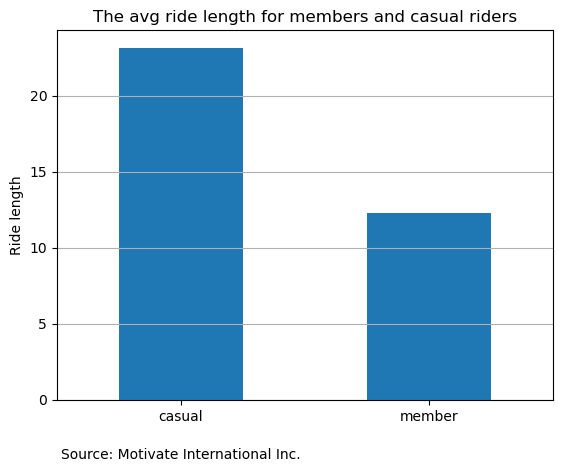

In [42]:
# The avg ride length - casual vs. member 
group_sub = cyclistic_optm.groupby('member_casual')
rider_time_avg = group_sub['ride_length'].mean()
rider_time_avg

ax = rider_time_avg.plot(kind='bar')

plt.ylabel('Ride length')
plt.title('The avg ride length for members and casual riders')


ax.set_xlabel('')

plt.xticks(rotation=0)
plt.grid(axis='y')

plt.text(0.25, -0.15, 'Source: Motivate International Inc.', ha='center', va='center', transform=ax.transAxes)

plt.show()

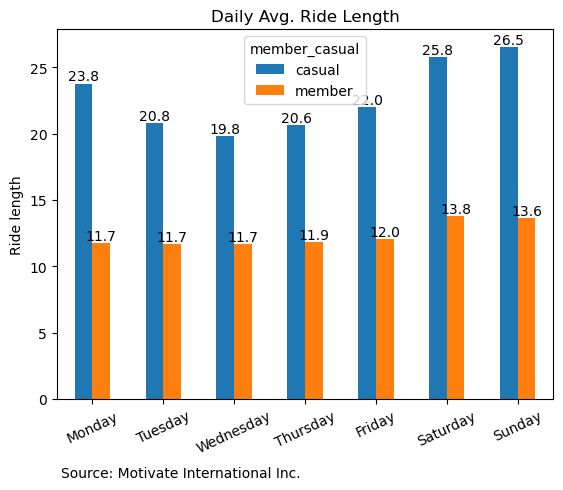

In [43]:
# Daily Avg. Ride Length
group_day = cyclistic_optm.groupby(['day_of_week', 'member_casual'])
avg_daily_ride = group_day['ride_length'].mean().unstack()

# change the order of the dataframe indices to display the days in the visualization correctly.
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
avg_daily_ride = avg_daily_ride.reindex(days)

avg_daily_ride


ax = avg_daily_ride.plot(kind='bar')

plt.ylabel('Ride length')
plt.title('Daily Avg. Ride Length')

# rotate the x axis labels 45 deg
plt.xticks(rotation=25)

# fmt='%.2f' to indicate a float point with decimal points  
# label_type can be either edge or center
# for a single bar chart ->  ax.bar_label(ax.containers[0], fmt='%d', label_type='edge')
    
# Add labels to the bars
for container in ax.containers:
    ax.bar_label(container, fmt='%0.1f', label_type='edge')
    
# ax.legend().remove()
ax.set_xlabel('')

plt.text(0.25, -0.2, 'Source: Motivate International Inc.', ha='center', va='center', transform=ax.transAxes)


plt.show()

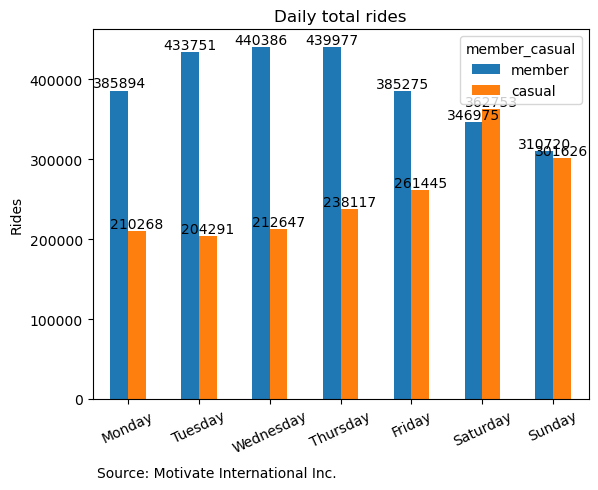

In [46]:
# Daily total rides

group_day_mc = cyclistic_optm.groupby(['day_of_week', 'member_casual'])
# - count - aggregate the grouped data and - unstack - reshape the data into a more tabular format
daily_total_rides = group_day['ride_id'].count().unstack()

days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
# change the order of the df index to display the days in the visualization correctly.
daily_total_rides = daily_total_rides.reindex(days) 

daily_total_rides = daily_total_rides[['member', 'casual']]

ax = daily_total_rides.plot(kind='bar')

plt.xticks(rotation=25)

# Add labels to the bars
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge')


plt.ylabel('Rides')
plt.title('Daily total rides')
plt.text(0.25, -0.2, 'Source: Motivate International Inc.', ha='center', va='center', transform=ax.transAxes)


ax.set_xlabel('')

plt.show()

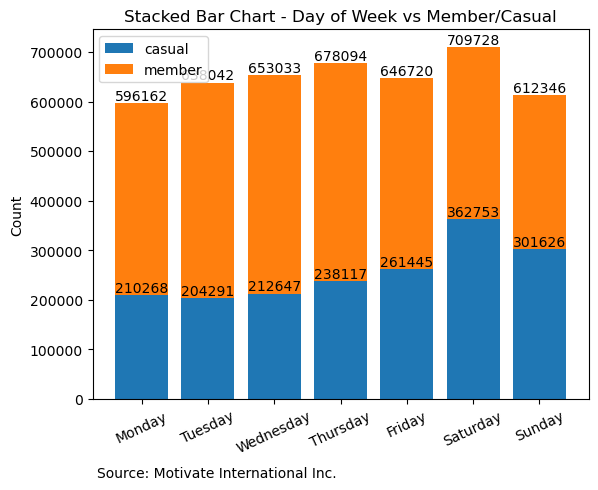

In [47]:
# Stacked bar chart
grouped_rides = cyclistic_optm.groupby(['day_of_week', 'member_casual'])
daily_rides_member = grouped_rides['ride_id'].count()
# - count - aggregate the grouped data and - unstack - reshape the data into a more tabular format
daily_rides_member = daily_rides_member.unstack()

# change the order of the df index to display the days in the visualization correctly.
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_rides_member = daily_rides_member.reindex(days) 


# Create a stacked bar chart using Matplotlib
fig, ax = plt.subplots()

# Plot the 'casual' bars
ax.bar(daily_rides_member.index, daily_rides_member['casual'], label='casual')

# Plot the 'member' bars on top of the 'casual' bars
ax.bar(daily_rides_member.index, daily_rides_member['member'], bottom=daily_rides_member['casual'], label='member')

plt.xticks(rotation=25)

# Add labels to the bars
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge')
    

ax.set_ylabel('Count')
ax.set_title('Stacked Bar Chart - Day of Week vs Member/Casual')

# 'right' is not a valid value for align; supported values are 'top', 'bottom', 'center', 'baseline', 'center_baseline'

plt.text(0.25, -0.2, 'Source: Motivate International Inc.', ha='center', va='center', transform=ax.transAxes)

# Set the legend
ax.legend()

# Display the chart
plt.show()


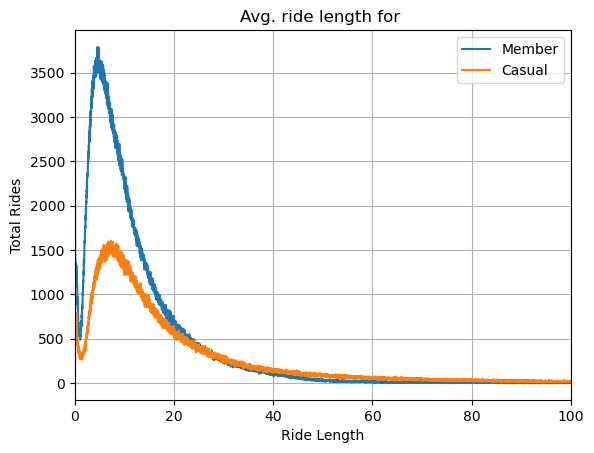

In [48]:
groupedby_ride_length = cyclistic_optm.groupby('ride_length')['member_casual'].value_counts().unstack()

plt.plot(groupedby_ride_length.index, groupedby_ride_length['member'], label='Member')
plt.plot(groupedby_ride_length.index, groupedby_ride_length['casual'], label='Casual')

# Set the labels and title
plt.xlabel('Ride Length')
plt.ylabel('Total Rides')
plt.title('Avg. ride length for ')

plt.xlim(0, 100)

# Add a legend
plt.legend()

# Add a grid
plt.grid(True)

# Display the plot
plt.show()


__Summary statistics for the ride_length__

The graph is right-skewed, indicating that the peak corresponds to the mode. The median is on the right of the mode, and the mean is on the right of the median.

Mode < Median < Mean

In [49]:
summary_stats_member = groupedby_ride_length['member'].describe()
summary_stats_casual = groupedby_ride_length['casual'].describe()


print('Annual members summary stats \n', summary_stats_member)

Annual members summary stats 
 count    10062.000000
mean       272.607633
std        706.538446
min          1.000000
25%          1.000000
50%          3.000000
75%         91.750000
max       3790.000000
Name: member, dtype: float64


In [50]:
print('casual riders summary stats \n', summary_stats_casual)

casual riders summary stats 
 count    18196.000000
mean        98.436305
std        270.229389
min          1.000000
25%          1.000000
50%          5.000000
75%         34.000000
max       1605.000000
Name: casual, dtype: float64


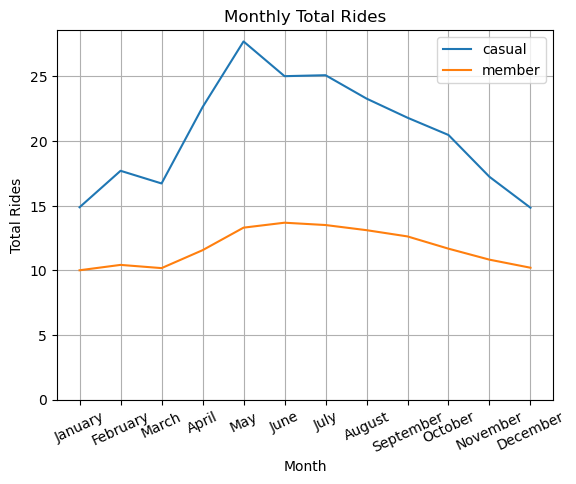

In [51]:

groupedby_month = cyclistic_optm.groupby(['start_month', 'member_casual'])
monthly_total_rides = groupedby_month['ride_length'].mean().unstack()

# Define the desired order of months
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Reindex the DataFrame based on the month_order
monthly_total_rides = monthly_total_rides.reindex(month_order)

# Create the line graph
plt.plot(monthly_total_rides.index, monthly_total_rides.values)


# Set the labels and title
plt.xlabel('Month')
plt.ylabel('Total Rides')
plt.title('Monthly Total Rides')

# Set the x-axis reference from zero
plt.ylim(bottom=0)

# Add a legend
plt.legend(monthly_total_rides.columns)

plt.xticks(rotation=25)


# Add a grid
plt.grid(True)

# Display the plot
plt.show()


## Act
__Conclusion & Recommendations__

- Annual members show more consistent numbers throughout the year, with slightly higher usage in the months of Summer and Fall. This could indicate a more regular and predictable usage pattern.
- In order to increase the conversion rate, we recommend implementing special offers and extensive marketing campaigns during the Summer season, as it has been observed that annual members exhibit a higher inclination towards riding during this period, particularly in Spring and Summer.
- Highlight the benefits of becoming an annual member, such as cost savings, convenience, and access to additional features.
- We strongly recommend implementing modifications on the bicycles to enhance their suitability for Winter and Fall weather conditions, while concurrently promoting their significant benefits for usage during these seasons. This proposition is based on the observation that riders are less active during Winter and Fall due to adverse weather conditions.
- Personalized Outreach - Analyze user data to identify casual riders who have shown consistent usage patterns or have used the service for a certain period. Target these users with personalized offers and promotions, emphasizing the advantages of becoming an annual member based on their specific usage patterns.
- Implement a referral program that rewards annual members for referring casual riders who convert into annual memberships. This can leverage the power of word-of-mouth marketing and encourage casual riders to consider the benefits of long-term membership.
- Consider offering additional benefits to annual members, such as priority access to popular bikes or exclusive events. Highlight these benefits in marketing materials to entice casual riders to upgrade their membership.